In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot encoding
num_classes = 10
y_train = np.eye(num_classes)[y_train.reshape(-1)]
y_test = np.eye(num_classes)[y_test.reshape(-1)]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\sagar\OneDrive\Desktop\hose\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Train the model
epochs = 30
batch_size = 128

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 142ms/step - accuracy: 0.3137 - loss: 1.8354 - val_accuracy: 0.5506 - val_loss: 1.2531
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.5445 - loss: 1.2760 - val_accuracy: 0.6125 - val_loss: 1.0987
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 144ms/step - accuracy: 0.6219 - loss: 1.0582 - val_accuracy: 0.6838 - val_loss: 0.8998
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 145ms/step - accuracy: 0.6835 - loss: 0.9091 - val_accuracy: 0.7184 - val_loss: 0.8030
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 144ms/step - accuracy: 0.7080 - loss: 0.8341 - val_accuracy: 0.7391 - val_loss: 0.7473
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 142ms/step - accuracy: 0.7352 - loss: 0.7586 - val_accuracy: 0.7391 - val_loss: 0.7432
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - accuracy: 0.7479 - loss: 0.7171 - val_accuracy: 0.7575 - val_loss: 0.6958
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 144ms/step - accuracy: 0.7613 - loss: 0

In [4]:
# Evaluate the model on the test set
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.6366506218910217
Test accuracy: 0.8051000237464905


In [6]:
model.save('cifar10_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Image 1: truck


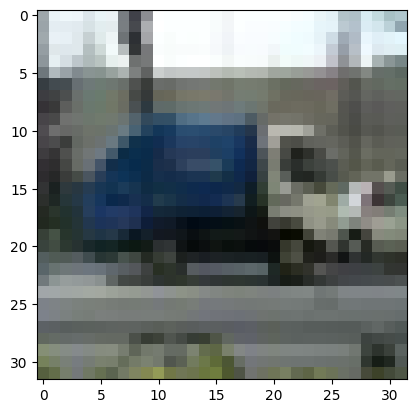

Image 2: deer


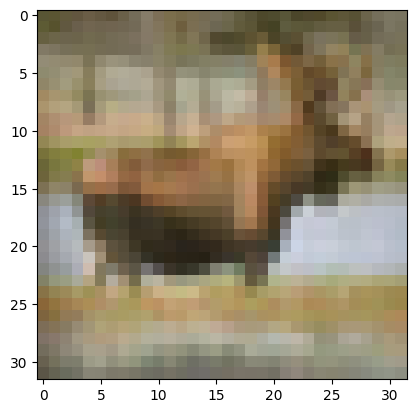

Image 3: cat


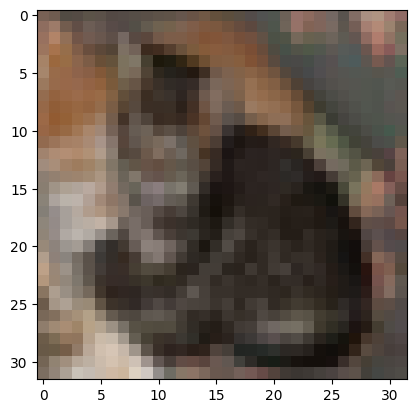

Image 4: dog


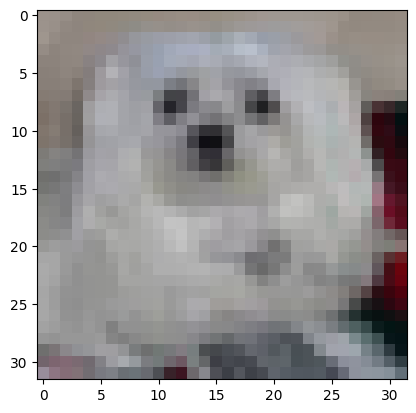

Image 5: truck


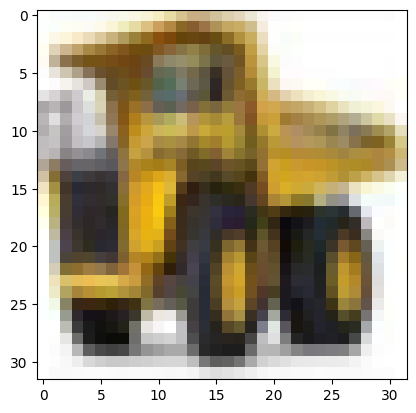

In [8]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_test = x_test.astype('float32') / 255

# Load your trained model
your_model = load_model('cifar10_model.h5')

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select a few random images from the test set
indices = np.random.choice(len(x_test), 5)
images = x_test[indices]

# Make predictions on the selected images
predictions = your_model.predict(images)

# Print the predicted classes for each image
for i, image in enumerate(images):
    predicted_class = class_names[np.argmax(predictions[i])]
    print(f"Image {i+1}: {predicted_class}")
    
    plt.imshow(image)
    plt.show()